In [3]:
import pandas as pd

file_path = "marketing_AB.csv"
df = pd.read_csv(file_path)

display(df)

df.info()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


#A/B testing

In [9]:
import pandas as pd
from scipy import stats

data = pd.read_csv('marketing_AB.csv')

data.head(3)


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18


In [18]:
data['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [12]:
from statsmodels.stats.proportion import proportions_ztest

In [22]:
# Separate the data into two groups
group_a = data[data['test group'] == 'ad']
group_b = data[data['test group'] != 'ad']

# Calculate conversion rates
conversion_rate_a = group_a['converted'].mean()
conversion_rate_b = group_b['converted'].mean()

# Perform a two-proportion z-test
conversions = [group_a['converted'].sum(), group_b['converted'].sum()]
samples = [len(group_a), len(group_b)]

from statsmodels.stats.proportion import proportions_ztest
z_stat, p_value = proportions_ztest(conversions, samples)

print(f'Conversion Rate ad: {conversion_rate_a:.2%}')
print(f'Conversion Rate psa: {conversion_rate_b:.2%}')
print(f'Z-Statistic: {z_stat:.2f}')
print(f'P-Value: {p_value:}')

Conversion Rate ad: 2.55%
Conversion Rate psa: 1.79%
Z-Statistic: 7.37
P-Value: 1.7052807161559727e-13


#Results of A/B Testing:

Conversion Rate ('ad' group): 2.55%

Conversion Rate ("psa" group): 1.79%

Z-Statistic: 7.37

P-Value: 1.70e-13 (very small, highly significant)

#Since the p-value is much smaller than 0.05, the difference in conversion rates is statistically significant.

#This suggests that the 'ad' group (Campaign A) performed better in driving conversions than the "psa" group.

#confidence intervals for both groups.

#Perform power analysis.


In [27]:
import numpy as np
import statsmodels.api as sm

se_a = np.sqrt((conversion_rate_a * (1 - conversion_rate_a)) / len(group_a))
se_b = np.sqrt((conversion_rate_b * (1 - conversion_rate_b)) / len(group_b))

ci_a = sm.stats.proportion_confint(group_a['converted'].sum(), len(group_a), alpha=0.05, method='normal')
ci_b = sm.stats.proportion_confint(group_b['converted'].sum(), len(group_b), alpha=0.05, method='normal')

effect_size = sm.stats.proportion_effectsize(conversion_rate_a, conversion_rate_b)
analysis = sm.stats.TTestIndPower()
power = analysis.solve_power(effect_size, nobs1=len(group_a), ratio=len(group_b)/len(group_a), alpha=0.05)

print(f"confidence intervals for \"ad\" group:  {ci_a}")
print(f"confidence intervals for \"non ad\" group:  {ci_b}")
print("Power of the Test:" ,power)

confidence intervals for "ad" group:  (0.0251349995427061, 0.025958119730661394)
confidence intervals for "non ad" group:  (0.016161914715211324, 0.019546298173753137)
Power of the Test: 1.0


#95% Confidence Interval (Group A - 'ad' group): (2.51%, 2.60%)

#95% Confidence Interval (Group B - Control group): (1.62%, 1.95%)

#Power of the Test: 1.0 (indicating a very strong ability to detect an effect)

#Visualize the results

<ipython-input-28-9339909e41ef>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Conversion Rate', data=plot_data, ci=None, palette='muted')
<ipython-input-28-9339909e41ef>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Conversion Rate', data=plot_data, ci=None, palette='muted')


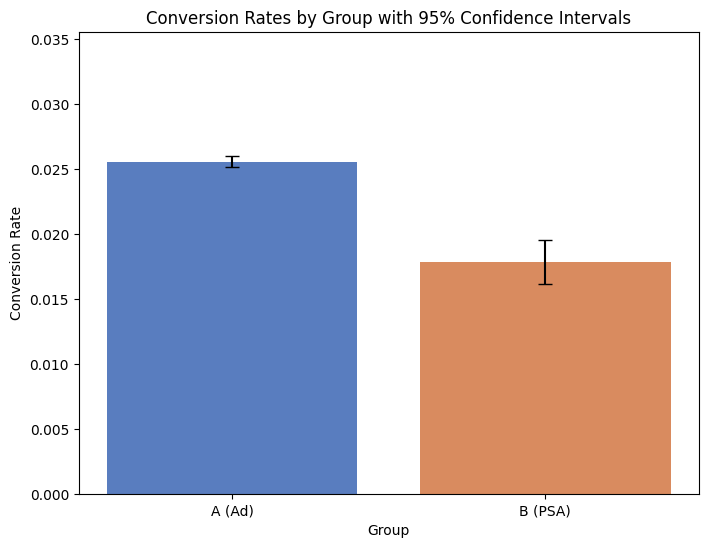

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
groups = ['A (Ad)', 'B (PSA)']
conversion_rates = [conversion_rate_a, conversion_rate_b]
ci_lower = [ci_a[0], ci_b[0]]
ci_upper = [ci_a[1], ci_b[1]]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': groups,
    'Conversion Rate': conversion_rates,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Conversion Rate', data=plot_data, ci=None, palette='muted')
plt.errorbar(x=range(len(groups)), y=conversion_rates, yerr=[np.array(conversion_rates) - np.array(ci_lower), np.array(ci_upper) - np.array(conversion_rates)], fmt='none', c='black', capsize=5)
plt.title('Conversion Rates by Group with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates) + 0.01)
plt.show()
